In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline
np.random.seed(7) # seeding random number generator



In [3]:
CollegeReviewCompiled = pd.read_csv(r'/content/CollegeReviewsCompiled.csv')
CollegeReviewCompiled.head(2)

,author,reviewBody,reviewRating,ratingMaxvalue,reviewTags,dateCreated,images,reviewUrl,reviewSource,originalText,name,reviewCount,aggregateRating,address,place_id,Unnamed: 15,Unnamed: 16
0,Dermot Dunne,Stunning new university campus near Dublin cit...,5,5,NaN,a year ago,https://lh5.googleusercontent.com/p/AF1QipPknw...,https://www.google.com/maps/contrib/1172180627...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...",5,5,NaN,4 years ago,https://lh5.googleusercontent.com/p/AF1QipOwtp...,https://www.google.com/maps/contrib/1018313073...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN


Adding a new column

In [4]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
CollegeReviewCompiled["Sentiment"] = CollegeReviewCompiled["reviewRating"].apply(sentiments)


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings

In [6]:
print(CollegeReviewCompiled.shape)
CollegeReviewCompiled.head(10)

(50, 18)


,author,reviewBody,reviewRating,ratingMaxvalue,reviewTags,dateCreated,images,reviewUrl,reviewSource,originalText,name,reviewCount,aggregateRating,address,place_id,Unnamed: 15,Unnamed: 16,Sentiment
0,Dermot Dunne,Stunning new university campus near Dublin cit...,5,5,NaN,a year ago,https://lh5.googleusercontent.com/p/AF1QipPknw...,https://www.google.com/maps/contrib/1172180627...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN,Positive
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...",5,5,NaN,4 years ago,https://lh5.googleusercontent.com/p/AF1QipOwtp...,https://www.google.com/maps/contrib/1018313073...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN,Positive
2,Omar Nicolai,I know this building has over 200 years of var...,5,5,NaN,a year ago,https://lh5.googleusercontent.com/p/AF1QipM4lc...,https://www.google.com/maps/contrib/1069724274...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN,Positive
3,ruth connolly,Great place to sit or exercise. Well kept safe...,5,5,NaN,a year ago,NaN,https://www.google.com/maps/contrib/1090465921...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN,Positive
4,Fintan Moloney,"Nice college grounds area for walking, jogging...",5,5,NaN,a year ago,https://lh5.googleusercontent.com/p/AF1QipPZRD...,https://www.google.com/maps/contrib/1052988761...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN,Positive
5,Hiberniaworld Group,Lots of teenegers and youths making trouble wh...,5,5,NaN,6 months ago,NaN,https://www.google.com/maps/contrib/1049183914...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN,Positive
6,John Rock,"Excellent campus, really beautiful and modern....",5,5,NaN,11 months ago,NaN,https://www.google.com/maps/contrib/1020293287...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN,Positive
7,Dr. Ajmal Ayub,"Great team, great people, great campus, good w...",5,5,NaN,2 months ago,https://lh5.googleusercontent.com/p/AF1QipPREf...,https://www.google.com/maps/contrib/1068160286...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN,Positive
8,Andre Skyberg,"Amazing campus with a good vibe, just missing ...",5,5,NaN,9 months ago,https://lh5.googleusercontent.com/p/AF1QipMGEV...,https://www.google.com/maps/contrib/1151439078...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN,Positive
9,Alan Kelly,Played a match on the GAA pitch vs St Brendan'...,4,5,NaN,a year ago,NaN,https://www.google.com/maps/contrib/1155086436...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN,Positive


In [7]:
CollegeReviewCompiled.describe()

,reviewRating,ratingMaxvalue,reviewTags,originalText,reviewCount,aggregateRating
count,50.000000,50.0,0.0,0.0,50.0,50.0
mean,4.660000,5.0,NaN,NaN,200.0,4.6
std,0.847806,0.0,NaN,NaN,0.0,0.0
min,1.000000,5.0,NaN,NaN,200.0,4.6
25%,5.000000,5.0,NaN,NaN,200.0,4.6
50%,5.000000,5.0,NaN,NaN,200.0,4.6
75%,5.000000,5.0,NaN,NaN,200.0,4.6
max,5.000000,5.0,NaN,NaN,200.0,4.6


In [9]:
CollegeReviewCompiled["Sentiment"].value_counts()

Positive    48
Negative     2
Name: Sentiment, dtype: int64

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [15]:
CollegeReviewCompiled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   author           50 non-null     object 
 1   reviewBody       42 non-null     object 
 2   reviewRating     50 non-null     int64  
 3   ratingMaxvalue   50 non-null     int64  
 4   reviewTags       0 non-null      float64
 5   dateCreated      50 non-null     object 
 6   images           21 non-null     object 
 7   reviewUrl        50 non-null     object 
 8   reviewSource     50 non-null     object 
 9   originalText     0 non-null      float64
 10  name             50 non-null     object 
 11  reviewCount      50 non-null     int64  
 12  aggregateRating  50 non-null     float64
 13  address          50 non-null     object 
 14  place_id         50 non-null     object 
 15  Unnamed: 15      30 non-null     object 
 16  Unnamed: 16      30 non-null     object 
 17  Sentiment        5

In [18]:
CollegeReviewCompiled['reviewBody'] = CollegeReviewCompiled['reviewBody'].astype(str)

In [19]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
CollegeReviewCompiled['reviewBody']=CollegeReviewCompiled['reviewBody'].apply(remove_special_characters)

In [21]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
CollegeReviewCompiled['reviewBody']=CollegeReviewCompiled['reviewBody'].apply(simple_stemmer)

In [22]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
CollegeReviewCompiled['reviewBody']=CollegeReviewCompiled['reviewBody'].apply(remove_stopwords)

{'don', 'this', 'that', 'here', 'few', 'during', 'now', 'didn', "couldn't", 'won', "mightn't", 'out', 'not', 'shouldn', "you've", 'whom', 'from', 'to', "won't", 'doing', 'were', 'about', 'below', 'against', 'very', 'but', 'such', 'should', 'these', 'have', 'his', 'am', "she's", 'under', 'which', 'is', 'ma', 'she', 'does', 't', "aren't", 'or', 'same', 'some', 'and', 'myself', 'how', "you'll", 'd', 'mightn', 'themselves', "should've", "shouldn't", 'too', 'up', 'on', 'hadn', 'other', 'wasn', 'had', 'what', 'theirs', 'who', 've', 'because', 'before', 'the', 'own', 'into', "that'll", 'himself', 'me', 'while', 'those', 'mustn', 'by', 'will', 'isn', "you'd", 'be', 'doesn', 'needn', 'between', 'if', 'haven', 'he', "don't", 'until', 'll', 'a', 'above', 'can', 'again', "haven't", 'y', "shan't", 'both', 'ours', 'as', 'i', 'for', 'do', 'in', 'no', 'ain', 'aren', "hasn't", 'of', 'further', 'him', 'with', 'than', 'only', 'hers', 'has', 'been', "hadn't", 'nor', 'yourselves', 'then', "isn't", 'down', 

In [57]:
#normalized train reviews
norm_train_reviews=CollegeReviewCompiled.reviewBody[:20]
norm_train_reviews[0]

'stun new univers campu near dublin citi centr centr excel music drama superb facil includ 400seater concert hall smaller recit hall theatr'

In [58]:
#Normalized test reviews
norm_test_reviews=CollegeReviewCompiled.reviewBody[20:]
norm_test_reviews[21]

'great campu go walk coupl option easili gain access dure day stonneybatt north circular road ha nice view mountain good track run well good children playground'

In [59]:

#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=0.5,binary=False,ngram_range=(1,3))



In [60]:
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (20, 1017)
BOW_cv_test: (30, 1017)


In [61]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=0.5,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)


Tfidf_train: (20, 1017)
Tfidf_test: (30, 1017)


In [62]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(CollegeReviewCompiled['Sentiment'])
print(sentiment_data.shape)

(50, 1)


In [65]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:20]
test_sentiments=sentiment_data[20:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [66]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [67]:

#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [68]:

#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 1.0
mnb_tfidf_score : 0.9666666666666667


In [69]:

#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00         1
    Negative       1.00      1.00      1.00        29

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00         1
    Negative       0.97      1.00      0.98        29

    accuracy                           0.97        30
   macro avg       0.48      0.50      0.49        30
weighted avg       0.93      0.97      0.95        30



In [70]:

#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[29  0]
 [ 0  1]]
[[29  0]
 [ 1  0]]


<function matplotlib.pyplot.show(*args, **kw)>

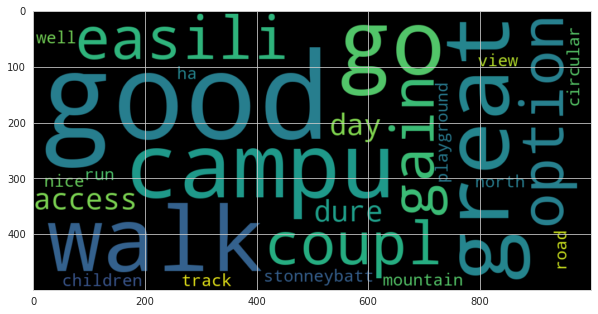

In [71]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

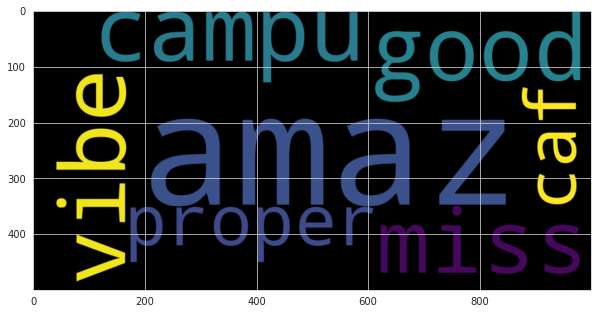

In [72]:

#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [74]:
CollegeReviewCompiled.groupby(by=["Sentiment"]).count()

,author,reviewBody,reviewRating,ratingMaxvalue,reviewTags,dateCreated,images,reviewUrl,reviewSource,originalText,name,reviewCount,aggregateRating,address,place_id,Unnamed: 15,Unnamed: 16
Sentiment,,,,,,,,,,,,,,,,,
Negative,2,2,2,2,0,2,0,2,2,0,2,2,2,2,2,1,1
Positive,48,48,48,48,0,48,21,48,48,0,48,48,48,48,48,29,29


In [77]:
CollegeReviewFiltered=CollegeReviewCompiled

In [78]:
CollegeReviewFiltered=CollegeReviewFiltered.drop(['reviewTags', 'images','originalText','reviewCount','aggregateRating','place_id'], axis=1)

In [80]:
CollegeReviewFiltered=CollegeReviewFiltered.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [85]:
CollegeReviewCompiled2 = pd.read_csv(r'/content/CollegeReviewsCompiled.csv')
CollegeReviewCompiled2.head(2)

,author,reviewBody,reviewRating,ratingMaxvalue,reviewTags,dateCreated,images,reviewUrl,reviewSource,originalText,name,reviewCount,aggregateRating,address,place_id,Unnamed: 15,Unnamed: 16
0,Dermot Dunne,Stunning new university campus near Dublin cit...,5,5,NaN,a year ago,https://lh5.googleusercontent.com/p/AF1QipPknw...,https://www.google.com/maps/contrib/1172180627...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...",5,5,NaN,4 years ago,https://lh5.googleusercontent.com/p/AF1QipOwtp...,https://www.google.com/maps/contrib/1018313073...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN


In [82]:
CollegeReviewFiltered.tail()

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
45,bijo alex,realli amaz beauti feel like home,5,5,2 months ago,https://www.google.com/maps/contrib/1029710217...,www.google.com,"TU Dublin, Grangegorman Campus","Grangegorman Lower, Dublin 7, Ireland",Positive
46,Luciano Machado de Almeida,nan,4,5,a month ago,https://www.google.com/maps/contrib/1181749749...,www.google.com,"TU Dublin, Grangegorman Campus","Grangegorman Lower, Dublin 7, Ireland",Positive
47,Michael Cullen,nan,5,5,2 months ago,https://www.google.com/maps/contrib/1020815597...,www.google.com,"TU Dublin, Grangegorman Campus","Grangegorman Lower, Dublin 7, Ireland",Positive
48,Vincent B,nan,4,5,a month ago,https://www.google.com/maps/contrib/1156113818...,www.google.com,"TU Dublin, Grangegorman Campus","Grangegorman Lower, Dublin 7, Ireland",Positive
49,Dr. Ajmal Ayub,great team great peopl great campu good work p...,5,5,2 months ago,https://www.google.com/maps/contrib/1068160286...,www.google.com,"TU Dublin, Grangegorman Campus","Grangegorman Lower, Dublin 7, Ireland",Positive


In [83]:
CollegeReviewFiltered.groupby(by=["Sentiment"]).count()

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address
Sentiment,,,,,,,,,
Negative,2,2,2,2,2,2,2,2,2
Positive,48,48,48,48,48,48,48,48,48


In [84]:
CollegeReviewFiltered.to_csv('CollegeReviewFiltered.csv')  

In [86]:
CollegeReviewCompiled2 = pd.read_csv(r'/content/CollegeReviewsCompiled.csv')
CollegeReviewCompiled2.head(2)

,author,reviewBody,reviewRating,ratingMaxvalue,reviewTags,dateCreated,images,reviewUrl,reviewSource,originalText,name,reviewCount,aggregateRating,address,place_id,Unnamed: 15,Unnamed: 16
0,Dermot Dunne,Stunning new university campus near Dublin cit...,5,5,NaN,a year ago,https://lh5.googleusercontent.com/p/AF1QipPknw...,https://www.google.com/maps/contrib/1172180627...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...",5,5,NaN,4 years ago,https://lh5.googleusercontent.com/p/AF1QipOwtp...,https://www.google.com/maps/contrib/1018313073...,www.google.com,NaN,"TU Dublin, Aungier Street",200,4.6,"TU Dublin, Aungier Street",ChIJZbQuzywMZ0gR7LNOrFuzlpI,NaN,NaN


In [87]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
CollegeReviewCompiled2["Sentiment"] = CollegeReviewCompiled2["reviewRating"].apply(sentiments)

In [91]:
CollegeReviewCompiled2=CollegeReviewCompiled2.drop(['reviewTags', 'images','originalText','reviewCount','aggregateRating','place_id'], axis=1)

In [89]:
CollegeReviewCompiled2=CollegeReviewCompiled2.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [92]:
CollegeReviewCompiled2.head()

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
0,Dermot Dunne,Stunning new university campus near Dublin cit...,5,5,a year ago,https://www.google.com/maps/contrib/1172180627...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...",5,5,4 years ago,https://www.google.com/maps/contrib/1018313073...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
2,Omar Nicolai,I know this building has over 200 years of var...,5,5,a year ago,https://www.google.com/maps/contrib/1069724274...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
3,ruth connolly,Great place to sit or exercise. Well kept safe...,5,5,a year ago,https://www.google.com/maps/contrib/1090465921...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
4,Fintan Moloney,"Nice college grounds area for walking, jogging...",5,5,a year ago,https://www.google.com/maps/contrib/1052988761...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive


In [93]:
CollegeReviewCompiled2.to_csv('CollegeReviewCompiled2.csv')  